# Small Scale Optimization

Apply the model for small instances (e.g. 6 facilities, and 10 oil spills in Hudson)

Outline of this script:
1. Input data
2. Optimization Model
3. Output in a form of Network Diagram

# Data

In [1]:
# import custom functions
import data_preparation
import custom_func
import model, model2
import model_analysis
# import libraries
import pandas as pd
import geopandas as gpd

In [2]:
# Import data
spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
spill_data = spill_data.sample(n=100)
station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
#station_data = station_data.iloc[[7,9,10, 13,15,16, 18]] # for small scale problem, we select stations nearby Hudson Bay & Strait
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
display(spill_data)
display(station_data)

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
161,NaN,o162,"(69.47676593300005, -117.55508288599998)",3230,Large,161.5,ISB,0,0,257
48,NaN,o49,"(74.29436777063665, -76.886204417729)",1260,Small,63.0,CDU,0,100,0
168,NaN,o169,"(70.62487977207968, -124.07225517408429)",7980,Large,399.0,CDU,0,800,0
219,NaN,o220,"(69.24304799574003, -137.32628644705787)",40,Small,2.0,CDU,0,100,0
45,NaN,o46,"(63.234507475578994, -82.34986282998018)",6280,Large,314.0,CDU,0,800,0
...,...,...,...,...,...,...,...,...,...,...
70,NaN,o71,"(63.4618611501623, -83.8871133493362)",870,Small,43.5,ISB,0,0,7
107,NaN,o108,"(74.13041980846197, -87.60536813220666)",250,Small,12.5,ISB,0,0,7
208,NaN,o209,"(61.48567202760547, -114.25987964031395)",20,Small,1.0,MCR,24,0,0
92,NaN,o93,"(64.23984829032568, -63.44266050044166)",7420,Large,371.0,MCR,54,0,0


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN


In [4]:
# %% One value
NumberStMax =5
DistanceMax = 200 # (DistanceMax*80)km  convert it to kilometer, typical speed 20km/hr -> 480km/day
TimeRMax = 220  # covert it into hours or minutes


In [5]:
# 
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)

In [6]:
max(Distance.values())

92.71820581652473

In [7]:
print('coordinates_st')
display(coordinates_st)

print('Demand')
display(Demand)
print('Availability')
display(Availability)
print('Eff')
display(Eff)

print('Distance')
display(Distance)

print('TimeR')
display(TimeR)

print('Cf_s'); display(Cf_s)
print('Cu_sor')
display(Cu_sor)

coordinates_st


([[70.0, -134.0],
  [70.63999938964844, -119.43000030517578],
  [67.08999633789062, -112.31999969482422],
  [62.599998474121094, -113.19000244140625],
  [60.529998779296875, -114.37999725341797],
  [68.86000061035156, -103.19000244140625],
  [63.93000030517578, -101.13999938964844],
  [60.060001373291016, -95.88999938964844],
  [75.11000061035156, -95.70999908447266],
  [63.029998779296875, -91.73999786376953],
  [62.66999816894531, -92.70800018310547],
  [73.4000015258789, -88.16000366210938],
  [73.4000015258789, -81.83000183105469],
  [64.2020034790039, -83.91000366210938],
  [71.70999908447266, -74.97000122070312],
  [67.66999816894531, -76.37999725341797],
  [64.62000274658203, -77.41000366210938],
  [68.93000030517578, -69.16999816894531],
  [63.150001525878906, -69.68000030517578],
  [68.93000030517578, -65.56999969482422]],
 {'s1': [70.0, -134.0],
  's2': [70.63999938964844, -119.43000030517578],
  's3': [67.08999633789062, -112.31999969482422],
  's4': [62.599998474121094, -11

Demand


{('o162', 'm'): 0,
 ('o162', 'c'): 0,
 ('o162', 'i'): 37,
 ('o49', 'm'): 0,
 ('o49', 'c'): 0,
 ('o49', 'i'): 37,
 ('o169', 'm'): 0,
 ('o169', 'c'): 0,
 ('o169', 'i'): 157,
 ('o220', 'm'): 100,
 ('o220', 'c'): 0,
 ('o220', 'i'): 0,
 ('o46', 'm'): 2,
 ('o46', 'c'): 0,
 ('o46', 'i'): 0,
 ('o200', 'm'): 2,
 ('o200', 'c'): 0,
 ('o200', 'i'): 0,
 ('o187', 'm'): 0,
 ('o187', 'c'): 5,
 ('o187', 'i'): 0,
 ('o206', 'm'): 0,
 ('o206', 'c'): 0,
 ('o206', 'i'): 37,
 ('o15', 'm'): 0,
 ('o15', 'c'): 31,
 ('o15', 'i'): 0,
 ('o165', 'm'): 0,
 ('o165', 'c'): 0,
 ('o165', 'i'): 157,
 ('o75', 'm'): 0,
 ('o75', 'c'): 110,
 ('o75', 'i'): 0,
 ('o154', 'm'): 20,
 ('o154', 'c'): 0,
 ('o154', 'i'): 0,
 ('o145', 'm'): 0,
 ('o145', 'c'): 31,
 ('o145', 'i'): 0,
 ('o182', 'm'): 2,
 ('o182', 'c'): 0,
 ('o182', 'i'): 0,
 ('o1', 'm'): 0,
 ('o1', 'c'): 0,
 ('o1', 'i'): 157,
 ('o36', 'm'): 0,
 ('o36', 'c'): 5,
 ('o36', 'i'): 0,
 ('o61', 'm'): 0,
 ('o61', 'c'): 0,
 ('o61', 'i'): 157,
 ('o110', 'm'): 0,
 ('o110', 'c'): 0,

Availability


{('s1', 'm'): 1400.0,
 ('s1', 'c'): 1600.0,
 ('s1', 'i'): 1600.0,
 ('s2', 'm'): 1800.0,
 ('s2', 'c'): 200.0,
 ('s2', 'i'): 1600.0,
 ('s3', 'm'): 1800.0,
 ('s3', 'c'): 400.0,
 ('s3', 'i'): 800.0,
 ('s4', 'm'): 1800.0,
 ('s4', 'c'): 1200.0,
 ('s4', 'i'): 1400.0,
 ('s5', 'm'): 600.0,
 ('s5', 'c'): 600.0,
 ('s5', 'i'): 1400.0,
 ('s6', 'm'): 1000.0,
 ('s6', 'c'): 200.0,
 ('s6', 'i'): 1000.0,
 ('s7', 'm'): 1000.0,
 ('s7', 'c'): 600.0,
 ('s7', 'i'): 1000.0,
 ('s8', 'm'): 200.0,
 ('s8', 'c'): 400.0,
 ('s8', 'i'): 1400.0,
 ('s9', 'm'): 1000.0,
 ('s9', 'c'): 600.0,
 ('s9', 'i'): 600.0,
 ('s10', 'm'): 600.0,
 ('s10', 'c'): 600.0,
 ('s10', 'i'): 1200.0,
 ('s11', 'm'): 2000.0,
 ('s11', 'c'): 600.0,
 ('s11', 'i'): 1600.0,
 ('s12', 'm'): 1000.0,
 ('s12', 'c'): 1000.0,
 ('s12', 'i'): 800.0,
 ('s13', 'm'): 600.0,
 ('s13', 'c'): 200.0,
 ('s13', 'i'): 800.0,
 ('s14', 'm'): 1000.0,
 ('s14', 'c'): 800.0,
 ('s14', 'i'): 1800.0,
 ('s15', 'm'): 1200.0,
 ('s15', 'c'): 2000.0,
 ('s15', 'i'): 1400.0,
 ('s16', 'm

Eff


{('s1', 'm'): 0.4,
 ('s1', 'c'): 0.5,
 ('s1', 'i'): 1.0,
 ('s2', 'm'): 0.30000000000000004,
 ('s2', 'c'): 0.1,
 ('s2', 'i'): 0.9,
 ('s3', 'm'): 0.1,
 ('s3', 'c'): 0.6000000000000001,
 ('s3', 'i'): 0.30000000000000004,
 ('s4', 'm'): 0.4,
 ('s4', 'c'): 0.8,
 ('s4', 'i'): 0.6000000000000001,
 ('s5', 'm'): 0.5,
 ('s5', 'c'): 0.30000000000000004,
 ('s5', 'i'): 0.5,
 ('s6', 'm'): 0.2,
 ('s6', 'c'): 1.0,
 ('s6', 'i'): 0.7000000000000001,
 ('s7', 'm'): 0.4,
 ('s7', 'c'): 0.4,
 ('s7', 'i'): 0.6000000000000001,
 ('s8', 'm'): 0.4,
 ('s8', 'c'): 0.6000000000000001,
 ('s8', 'i'): 0.8,
 ('s9', 'm'): 0.2,
 ('s9', 'c'): 0.5,
 ('s9', 'i'): 0.8,
 ('s10', 'm'): 0.2,
 ('s10', 'c'): 0.8,
 ('s10', 'i'): 0.30000000000000004,
 ('s11', 'm'): 0.4,
 ('s11', 'c'): 0.2,
 ('s11', 'i'): 0.4,
 ('s12', 'm'): 0.2,
 ('s12', 'c'): 1.0,
 ('s12', 'i'): 0.1,
 ('s13', 'm'): 0.5,
 ('s13', 'c'): 0.5,
 ('s13', 'i'): 0.4,
 ('s14', 'm'): 0.30000000000000004,
 ('s14', 'c'): 0.5,
 ('s14', 'i'): 0.9,
 ('s15', 'm'): 0.300000000000000

Distance


{('o162', 's1'): 16.453237551936407,
 ('o162', 's2'): 2.206448823770583,
 ('o162', 's3'): 5.753502533102285,
 ('o162', 's4'): 8.145176788116867,
 ('o162', 's5'): 9.493464363505192,
 ('o162', 's6'): 14.378316221735172,
 ('o162', 's7'): 17.326905309486254,
 ('o162', 's8'): 23.623111650975005,
 ('o162', 's9'): 22.55972182964804,
 ('o162', 's10'): 26.607884616579923,
 ('o162', 's11'): 25.762564076834202,
 ('o162', 's12'): 29.655733323097373,
 ('o162', 's13'): 35.93985628422194,
 ('o162', 's14'): 34.05605074402678,
 ('o162', 's15'): 42.643599914337166,
 ('o162', 's16'): 41.21470861735042,
 ('o162', 's17'): 40.437799979785794,
 ('o162', 's18'): 48.38817529566449,
 ('o162', 's19'): 48.291320554850664,
 ('o162', 's20'): 51.98795985059398,
 ('o49', 's1'): 57.275010734833444,
 ('o49', 's2'): 42.70045300569049,
 ('o49', 's3'): 36.15876865154389,
 ('o49', 's4'): 38.14084068401741,
 ('o49', 's5'): 39.9404812131828,
 ('o49', 's6'): 26.859298941541812,
 ('o49', 's7'): 26.37548997038734,
 ('o49', 's8'

TimeR


{('o162', 's1'): 16.453237551936407,
 ('o162', 's2'): 2.206448823770583,
 ('o162', 's3'): 5.753502533102285,
 ('o162', 's4'): 8.145176788116867,
 ('o162', 's5'): 9.493464363505192,
 ('o162', 's6'): 14.378316221735172,
 ('o162', 's7'): 17.326905309486254,
 ('o162', 's8'): 23.623111650975005,
 ('o162', 's9'): 22.55972182964804,
 ('o162', 's10'): 26.607884616579923,
 ('o162', 's11'): 25.762564076834202,
 ('o162', 's12'): 29.655733323097373,
 ('o162', 's13'): 35.93985628422194,
 ('o162', 's14'): 34.05605074402678,
 ('o162', 's15'): 42.643599914337166,
 ('o162', 's16'): 41.21470861735042,
 ('o162', 's17'): 40.437799979785794,
 ('o162', 's18'): 48.38817529566449,
 ('o162', 's19'): 48.291320554850664,
 ('o162', 's20'): 51.98795985059398,
 ('o49', 's1'): 57.275010734833444,
 ('o49', 's2'): 42.70045300569049,
 ('o49', 's3'): 36.15876865154389,
 ('o49', 's4'): 38.14084068401741,
 ('o49', 's5'): 39.9404812131828,
 ('o49', 's6'): 26.859298941541812,
 ('o49', 's7'): 26.37548997038734,
 ('o49', 's8'

Cf_s


{'s1': 20000.0,
 's2': 60000.0,
 's3': 80000.0,
 's4': 50000.0,
 's5': 20000.0,
 's6': 40000.0,
 's7': 60000.0,
 's8': 60000.0,
 's9': 30000.0,
 's10': 100000.0,
 's11': 20000.0,
 's12': 80000.0,
 's13': 20000.0,
 's14': 60000.0,
 's15': 40000.0,
 's16': 10000.0,
 's17': 80000.0,
 's18': 50000.0,
 's19': 90000.0,
 's20': 70000.0}

Cu_sor


{('s1', 'o162', 'm'): 16.453237551936407,
 ('s1', 'o162', 'c'): 32.906475103872815,
 ('s1', 'o162', 'i'): 49.35971265580922,
 ('s2', 'o162', 'm'): 2.206448823770583,
 ('s2', 'o162', 'c'): 4.412897647541166,
 ('s2', 'o162', 'i'): 6.619346471311749,
 ('s3', 'o162', 'm'): 5.753502533102285,
 ('s3', 'o162', 'c'): 11.50700506620457,
 ('s3', 'o162', 'i'): 17.260507599306855,
 ('s4', 'o162', 'm'): 8.145176788116867,
 ('s4', 'o162', 'c'): 16.290353576233734,
 ('s4', 'o162', 'i'): 24.4355303643506,
 ('s5', 'o162', 'm'): 9.493464363505192,
 ('s5', 'o162', 'c'): 18.986928727010383,
 ('s5', 'o162', 'i'): 28.480393090515577,
 ('s6', 'o162', 'm'): 14.378316221735172,
 ('s6', 'o162', 'c'): 28.756632443470345,
 ('s6', 'o162', 'i'): 43.13494866520551,
 ('s7', 'o162', 'm'): 17.326905309486254,
 ('s7', 'o162', 'c'): 34.65381061897251,
 ('s7', 'o162', 'i'): 51.980715928458764,
 ('s8', 'o162', 'm'): 23.623111650975005,
 ('s8', 'o162', 'c'): 47.24622330195001,
 ('s8', 'o162', 'i'): 70.86933495292502,
 ('s9'

In [8]:
OilSpills

['o162',
 'o49',
 'o169',
 'o220',
 'o46',
 'o200',
 'o187',
 'o206',
 'o15',
 'o165',
 'o75',
 'o154',
 'o145',
 'o182',
 'o1',
 'o36',
 'o61',
 'o110',
 'o175',
 'o37',
 'o14',
 'o88',
 'o41',
 'o47',
 'o8',
 'o118',
 'o119',
 'o35',
 'o192',
 'o151',
 'o171',
 'o17',
 'o150',
 'o152',
 'o104',
 'o205',
 'o204',
 'o222',
 'o5',
 'o76',
 'o30',
 'o137',
 'o215',
 'o10',
 'o143',
 'o196',
 'o166',
 'o31',
 'o153',
 'o92',
 'o113',
 'o80',
 'o43',
 'o44',
 'o185',
 'o158',
 'o117',
 'o72',
 'o22',
 'o23',
 'o34',
 'o216',
 'o26',
 'o105',
 'o6',
 'o69',
 'o19',
 'o170',
 'o214',
 'o160',
 'o73',
 'o64',
 'o68',
 'o85',
 'o221',
 'o83',
 'o70',
 'o224',
 'o87',
 'o38',
 'o98',
 'o52',
 'o48',
 'o195',
 'o42',
 'o223',
 'o115',
 'o132',
 'o125',
 'o112',
 'o178',
 'o101',
 'o32',
 'o57',
 'o56',
 'o71',
 'o108',
 'o209',
 'o93',
 'o202']

In [9]:
#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min) 
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [10]:
Demand

{('o162', 'm'): 0,
 ('o162', 'c'): 0,
 ('o162', 'i'): 37,
 ('o49', 'm'): 0,
 ('o49', 'c'): 0,
 ('o49', 'i'): 37,
 ('o169', 'm'): 0,
 ('o169', 'c'): 0,
 ('o169', 'i'): 157,
 ('o220', 'm'): 100,
 ('o220', 'c'): 0,
 ('o220', 'i'): 0,
 ('o46', 'm'): 2,
 ('o46', 'c'): 0,
 ('o46', 'i'): 0,
 ('o200', 'm'): 2,
 ('o200', 'c'): 0,
 ('o200', 'i'): 0,
 ('o187', 'm'): 0,
 ('o187', 'c'): 5,
 ('o187', 'i'): 0,
 ('o206', 'm'): 0,
 ('o206', 'c'): 0,
 ('o206', 'i'): 37,
 ('o15', 'm'): 0,
 ('o15', 'c'): 31,
 ('o15', 'i'): 0,
 ('o165', 'm'): 0,
 ('o165', 'c'): 0,
 ('o165', 'i'): 157,
 ('o75', 'm'): 0,
 ('o75', 'c'): 110,
 ('o75', 'i'): 0,
 ('o154', 'm'): 20,
 ('o154', 'c'): 0,
 ('o154', 'i'): 0,
 ('o145', 'm'): 0,
 ('o145', 'c'): 31,
 ('o145', 'i'): 0,
 ('o182', 'm'): 2,
 ('o182', 'c'): 0,
 ('o182', 'i'): 0,
 ('o1', 'm'): 0,
 ('o1', 'c'): 0,
 ('o1', 'i'): 157,
 ('o36', 'm'): 0,
 ('o36', 'c'): 5,
 ('o36', 'i'): 0,
 ('o61', 'm'): 0,
 ('o61', 'c'): 0,
 ('o61', 'i'): 157,
 ('o110', 'm'): 0,
 ('o110', 'c'): 0,

# Run Model

In [11]:
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model2.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, Cu_sor)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter PoolSearchMode to value 2
Set parameter LogFile to value "Outputs/Logfiles/model_moo(Apr 09,1329).log"
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12101 rows, 8060 columns and 20060 nonzeros
Model fingerprint: 0x3ba2b195
Variable types: 6000 continuous, 2060 integer (2060 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [1e-04, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
         Reset PoolSearchMode to zero.

---------------------------------------------------------------------------
Multi-objectives: starting optimi

In [12]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o162,s1,70.000000,-134.000000,69.476768,-117.555084,i,37.0,16.453238
1,o162,s2,70.639999,-119.430000,69.476768,-117.555084,i,37.0,2.206449
2,o162,s14,64.202003,-83.910004,69.476768,-117.555084,i,37.0,34.056051
3,o49,s1,70.000000,-134.000000,74.294365,-76.886208,i,37.0,57.275011
4,o49,s2,70.639999,-119.430000,74.294365,-76.886208,i,37.0,42.700453
...,...,...,...,...,...,...,...,...,...
154,o108,s12,73.400002,-88.160004,74.130417,-87.605370,c,110.0,0.917129
155,o93,s6,68.860001,-103.190002,64.239845,-63.442661,c,110.0,40.014959
156,o93,s12,73.400002,-88.160004,64.239845,-63.442661,c,110.0,26.360111
157,o202,s6,68.860001,-103.190002,64.319290,-78.576790,c,31.0,25.028549


In [13]:
#display(assignment.loc[assignment['Spill #'] == 'o47'])
#display(min(assignment.loc[assignment['Spill #'] == 'o47']['Distance']))

In [14]:
import numpy as np
print(np.where(assignment['Distance'] == 2.651846197637919)[0])

# call a df based on index
assignment.iloc[np.where(assignment['Distance'] == 2.651846197637919)[0]]
assignment.columns

[]


Index(['Spill #', 'Station no.', 'St_Latitude', 'St_Longitude',
       'Spill_Latitude', 'Spill_Longitude', 'Resource Type',
       'Quantity deployed', 'Distance'],
      dtype='object')

In [15]:
assignment_df = pd.DataFrame(columns=list(assignment.columns.values))
for i,o in enumerate(assignment['Spill #'].unique()):
    minD = min(assignment.loc[assignment['Spill #'] == o]['Distance'])
    df = assignment.iloc[np.where(assignment['Distance'] == minD)[0]]
    assignment_df = pd.concat([assignment_df, df])
assignment_df

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
1,o162,s2,70.639999,-119.430000,69.476768,-117.555084,i,37.0,2.206449
5,o49,s14,64.202003,-83.910004,74.294365,-76.886208,i,37.0,12.295913
7,o169,s2,70.639999,-119.430000,70.624878,-124.072258,i,157.0,4.642282
10,o206,s2,70.639999,-119.430000,62.029091,-114.149010,i,37.0,10.101317
13,o165,s2,70.639999,-119.430000,70.529900,-121.806259,i,157.0,2.378808
...,...,...,...,...,...,...,...,...,...
150,o115,s12,73.400002,-88.160004,79.482666,-85.112854,c,31.0,6.803229
151,o178,s6,68.860001,-103.190002,69.455536,-123.856422,c,31.0,20.674999
154,o108,s12,73.400002,-88.160004,74.130417,-87.605370,c,110.0,0.917129
156,o93,s12,73.400002,-88.160004,64.239845,-63.442661,c,110.0,26.360111


In [16]:
assignment.iloc[np.where(assignment['Distance'] == minD)[0]]

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
158,o202,s12,73.400002,-88.160004,64.31929,-78.57679,c,31.0,13.20217


In [17]:
print('Sensitivity_n')
display(Sensitivity_n)

print('Spill_df')
display(spill_df)
print('[item for item in deploy_1s.index]')
display([item for item in deploy_1s.index])
print('deploy_1s')
display(deploy_1s)
print('deploy_1s.index')
display(deploy_1s.index)

Sensitivity_n


{'o162': 0.25471698113207547,
 'o49': 0.2169811320754717,
 'o169': 0.330188679245283,
 'o220': 0.8490566037735849,
 'o46': 0.8584905660377359,
 'o200': 0.6226415094339622,
 'o187': 0.8490566037735849,
 'o206': 0.0660377358490566,
 'o15': 0.7169811320754716,
 'o165': 0.330188679245283,
 'o75': 0.8867924528301887,
 'o154': 0.25471698113207547,
 'o145': 0.5377358490566038,
 'o182': 0.8490566037735849,
 'o1': 0.8584905660377359,
 'o36': 0.09433962264150944,
 'o61': 0.8584905660377359,
 'o110': 0.16037735849056603,
 'o175': 0.330188679245283,
 'o37': 0.2830188679245283,
 'o14': 0.8584905660377359,
 'o88': 0.4339622641509434,
 'o41': 0.330188679245283,
 'o47': 0.6886792452830188,
 'o8': 0.3490566037735849,
 'o118': 0.32075471698113206,
 'o119': 0.32075471698113206,
 'o35': 0.09433962264150944,
 'o192': 0.09433962264150944,
 'o151': 0.5377358490566038,
 'o171': 0.330188679245283,
 'o17': 0.6886792452830188,
 'o150': 0.25471698113207547,
 'o152': 0.5377358490566038,
 'o104': 0.3490566037735849

Spill_df


,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o162,69.476768,-117.555084,3230,27.0
1,o49,74.294365,-76.886208,1260,23.0
2,o169,70.624878,-124.072258,7980,35.0
3,o220,69.243050,-137.326294,40,90.0
4,o46,63.234509,-82.349861,6280,91.0
...,...,...,...,...,...
95,o71,63.461861,-83.887115,870,91.0
96,o108,74.130417,-87.605370,250,70.0
97,o209,61.485672,-114.259880,20,7.0
98,o93,64.239845,-63.442661,7420,16.0


[item for item in deploy_1s.index]


[('o162', 's1', 'i'),
 ('o162', 's2', 'i'),
 ('o162', 's14', 'i'),
 ('o49', 's1', 'i'),
 ('o49', 's2', 'i'),
 ('o49', 's14', 'i'),
 ('o169', 's1', 'i'),
 ('o169', 's2', 'i'),
 ('o169', 's14', 'i'),
 ('o187', 's6', 'c'),
 ('o187', 's12', 'c'),
 ('o206', 's1', 'i'),
 ('o206', 's2', 'i'),
 ('o206', 's14', 'i'),
 ('o15', 's6', 'c'),
 ('o15', 's12', 'c'),
 ('o165', 's1', 'i'),
 ('o165', 's2', 'i'),
 ('o165', 's14', 'i'),
 ('o75', 's6', 'c'),
 ('o75', 's12', 'c'),
 ('o145', 's6', 'c'),
 ('o145', 's12', 'c'),
 ('o1', 's1', 'i'),
 ('o1', 's2', 'i'),
 ('o1', 's14', 'i'),
 ('o36', 's6', 'c'),
 ('o36', 's12', 'c'),
 ('o61', 's1', 'i'),
 ('o61', 's2', 'i'),
 ('o61', 's14', 'i'),
 ('o110', 's1', 'i'),
 ('o110', 's2', 'i'),
 ('o110', 's14', 'i'),
 ('o88', 's6', 'c'),
 ('o88', 's12', 'c'),
 ('o8', 's6', 'c'),
 ('o8', 's12', 'c'),
 ('o118', 's6', 'c'),
 ('o118', 's12', 'c'),
 ('o35', 's1', 'i'),
 ('o35', 's2', 'i'),
 ('o35', 's14', 'i'),
 ('o151', 's1', 'i'),
 ('o151', 's2', 'i'),
 ('o151', 's14', 'i'

deploy_1s


o162  s1   i     37.0
      s2   i     37.0
      s14  i     37.0
o49   s1   i     37.0
      s2   i     37.0
                ...  
o108  s12  c    110.0
o93   s6   c    110.0
      s12  c    110.0
o202  s6   c     31.0
      s12  c     31.0
Length: 159, dtype: float64

deploy_1s.index


MultiIndex([('o162',  's1', 'i'),
            ('o162',  's2', 'i'),
            ('o162', 's14', 'i'),
            ( 'o49',  's1', 'i'),
            ( 'o49',  's2', 'i'),
            ( 'o49', 's14', 'i'),
            ('o169',  's1', 'i'),
            ('o169',  's2', 'i'),
            ('o169', 's14', 'i'),
            ('o187',  's6', 'c'),
            ...
            ( 'o32', 's14', 'i'),
            ( 'o71',  's1', 'i'),
            ( 'o71',  's2', 'i'),
            ( 'o71', 's14', 'i'),
            ('o108',  's6', 'c'),
            ('o108', 's12', 'c'),
            ( 'o93',  's6', 'c'),
            ( 'o93', 's12', 'c'),
            ('o202',  's6', 'c'),
            ('o202', 's12', 'c')],
           length=159)

### Table 3: Resource deployment from facilities  

In [18]:

selected_st_name = list(select_1s.reset_index().level_0)
selected_st_name

['s6', 's2', 's1', 's14', 's12']

In [19]:
deploy_1s

o162  s1   i     37.0
      s2   i     37.0
      s14  i     37.0
o49   s1   i     37.0
      s2   i     37.0
                ...  
o108  s12  c    110.0
o93   s6   c    110.0
      s12  c    110.0
o202  s6   c     31.0
      s12  c     31.0
Length: 159, dtype: float64

In [20]:
deploy_df = pd.DataFrame(deploy_1s.reset_index())
deploy_df
#deploy_df.columns = ['St', 'os', 'rr','amount']
#print(deploy_df.columns)

,level_0,level_1,level_2,0
0,o162,s1,i,37.0
1,o162,s2,i,37.0
2,o162,s14,i,37.0
3,o49,s1,i,37.0
4,o49,s2,i,37.0
...,...,...,...,...
154,o108,s12,c,110.0
155,o93,s6,c,110.0
156,o93,s12,c,110.0
157,o202,s6,c,31.0


In [21]:
max(Distance_n.values())

1.0

In [22]:
selected_st_name.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [23]:
resource_deployment_from_facility = pd.DataFrame(columns=['M','C','I'])
for index, st in enumerate(selected_st_name):
    a = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'm'), 0].sum()
    b = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'c'), 0].sum()
    c = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'i'), 0].sum()
    resource_deployment_from_facility.loc[index] = [a,b,c]
    
resource_deployment_from_facility.index=selected_st_name
resource_deployment_from_facility

,M,C,I
s6,0.0,0.0,0.0
s2,0.0,0.0,0.0
s1,0.0,0.0,0.0
s14,0.0,0.0,0.0
s12,0.0,0.0,0.0


# Sensitivity Analysis

In [24]:
#deploy_1s
sum(Distance.values()) / len(Distance)
max(Distance.values())

92.71820581652473

In [25]:
display(select_1s)
#display(station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)])
display(spill_df)

s6   c    1.0
s2   i    1.0
s1   i    1.0
s14  i    1.0
s12  c    1.0
dtype: float64

,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o162,69.476768,-117.555084,3230,27.0
1,o49,74.294365,-76.886208,1260,23.0
2,o169,70.624878,-124.072258,7980,35.0
3,o220,69.243050,-137.326294,40,90.0
4,o46,63.234509,-82.349861,6280,91.0
...,...,...,...,...,...
95,o71,63.461861,-83.887115,870,91.0
96,o108,74.130417,-87.605370,250,70.0
97,o209,61.485672,-114.259880,20,7.0
98,o93,64.239845,-63.442661,7420,16.0


In [26]:
selected_supply_stations = list(deploy_1s.reset_index().level_1.unique())
len(selected_supply_stations)#.shape[0]
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)].reset_index()
import matplotlib.pyplot as plt

In [27]:
#data_st_selected.loc[:, 'Station no.'][i] #+ 1

In [27]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

# Model
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model2.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, Cu_sor)

# Draw the network
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [28]:
#import model_analysis

C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\multiobjective_location_allocation_env\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\multiobjective_location_allocation_env\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


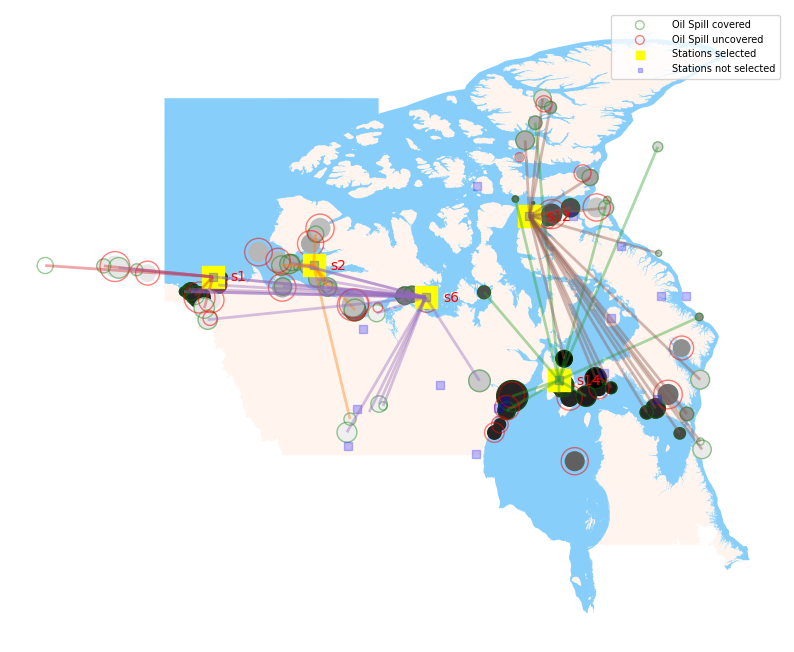

In [29]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [30]:
import pandas as pd
df = pd.DataFrame()
#df['ll'] = list([2,10])
#df.loc[1]

In [31]:
df

""


In [32]:
assignment.columns

Index(['Spill #', 'Station no.', 'St_Latitude', 'St_Longitude',
       'Spill_Latitude', 'Spill_Longitude', 'Resource Type',
       'Quantity deployed', 'Distance'],
      dtype='object')

In [33]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o162,s1,70.000000,-134.000000,69.476768,-117.555084,i,37.0,16.453238
1,o162,s2,70.639999,-119.430000,69.476768,-117.555084,i,37.0,2.206449
2,o162,s14,64.202003,-83.910004,69.476768,-117.555084,i,37.0,34.056051
3,o49,s1,70.000000,-134.000000,74.294365,-76.886208,i,37.0,57.275011
4,o49,s2,70.639999,-119.430000,74.294365,-76.886208,i,37.0,42.700453
...,...,...,...,...,...,...,...,...,...
154,o108,s12,73.400002,-88.160004,74.130417,-87.605370,c,110.0,0.917129
155,o93,s6,68.860001,-103.190002,64.239845,-63.442661,c,110.0,40.014959
156,o93,s12,73.400002,-88.160004,64.239845,-63.442661,c,110.0,26.360111
157,o202,s6,68.860001,-103.190002,64.319290,-78.576790,c,31.0,25.028549


In [34]:
display(assignment)
display(deploy_1s)

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o162,s1,70.000000,-134.000000,69.476768,-117.555084,i,37.0,16.453238
1,o162,s2,70.639999,-119.430000,69.476768,-117.555084,i,37.0,2.206449
2,o162,s14,64.202003,-83.910004,69.476768,-117.555084,i,37.0,34.056051
3,o49,s1,70.000000,-134.000000,74.294365,-76.886208,i,37.0,57.275011
4,o49,s2,70.639999,-119.430000,74.294365,-76.886208,i,37.0,42.700453
...,...,...,...,...,...,...,...,...,...
154,o108,s12,73.400002,-88.160004,74.130417,-87.605370,c,110.0,0.917129
155,o93,s6,68.860001,-103.190002,64.239845,-63.442661,c,110.0,40.014959
156,o93,s12,73.400002,-88.160004,64.239845,-63.442661,c,110.0,26.360111
157,o202,s6,68.860001,-103.190002,64.319290,-78.576790,c,31.0,25.028549


o162  s1   i     37.0
      s2   i     37.0
      s14  i     37.0
o49   s1   i     37.0
      s2   i     37.0
                ...  
o108  s12  c    110.0
o93   s6   c    110.0
      s12  c    110.0
o202  s6   c     31.0
      s12  c     31.0
Length: 159, dtype: float64

In [35]:
deploy_reset = deploy_1s.reset_index()
deploy_reset.columns = ['Station no.', 'Spill #', 'Resource Type', 'Quantity deployed']

In [36]:
display(assignment)

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o162,s1,70.000000,-134.000000,69.476768,-117.555084,i,37.0,16.453238
1,o162,s2,70.639999,-119.430000,69.476768,-117.555084,i,37.0,2.206449
2,o162,s14,64.202003,-83.910004,69.476768,-117.555084,i,37.0,34.056051
3,o49,s1,70.000000,-134.000000,74.294365,-76.886208,i,37.0,57.275011
4,o49,s2,70.639999,-119.430000,74.294365,-76.886208,i,37.0,42.700453
...,...,...,...,...,...,...,...,...,...
154,o108,s12,73.400002,-88.160004,74.130417,-87.605370,c,110.0,0.917129
155,o93,s6,68.860001,-103.190002,64.239845,-63.442661,c,110.0,40.014959
156,o93,s12,73.400002,-88.160004,64.239845,-63.442661,c,110.0,26.360111
157,o202,s6,68.860001,-103.190002,64.319290,-78.576790,c,31.0,25.028549


NameError: name 'lc_m' is not defined

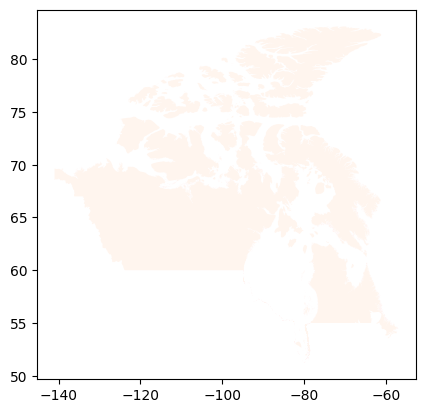

In [37]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt
unique_stations = assignment['Station no.'].unique()

fig, ax = plt.subplots()
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticLand.plot(ax=ax, color="seashell")

for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()
    d_m = pd.DataFrame(d1.loc[d1['Resource Type'] == 'm'].copy())
    d_c = d1.loc[d1['Resource Type'] == 'c'].copy()
    d_i = d1.loc[d1['Resource Type'] == 'i'].copy()

    new_list_m = []
    for r1 in range(d_m.shape[0]):
        new_list_m.append([(d_m.loc[r1, 'Spill_Longitude'], d_m.loc[r1, 'Spill_Latitude']), (d_m.loc[r1, 'St_Longitude'], d_m.loc[r1, 'St_Latitude'])])
        # d_m.loc[2, 'Spill_Longitude']
        # new_list_m.append([(d_m.Spill_Longitude[r1], d_m.Spill_Latitude[r1]), (d_m.St_Longitude[r1], d_m.St_Latitude[r1])])
        lc_m = mc.LineCollection(new_list_m, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dashed')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)

In [ ]:
d_m.loc[2, 'Spill_Longitude']

In [ ]:
d_m.Spill_Longitude[0]

In [ ]:
print(d_m.shape)
print(d1.shape) #.Spill_Longitude[1]
print(d_m.shape[0])
display(d1)
display(d_m)

In [ ]:
d_m
#df.loc[df['col1'] == value]

In [ ]:
assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()

# Multiscene

In [ ]:
import multiscene
#import gurobipy as gp
#from gurobipy import GRB

In [ ]:
multiscene.analyze_multiscene(model, Stations, OilSpills, ResourcesD, Demand, deploy, select)